In [155]:
import pandas as pd
import yaml
import os
#import cv2                  #conda install conda-forge::opencv
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import PIL.Image as Image

with open('data.yaml', 'r') as f:
    data = yaml.safe_load(f)
    number_classes=data['nc']
    classes=data['names']
    
train_path="./train"
val_path="./valid"

print(train_path)

def get_files(path, endswith):
    files = []
    for root, dirs, file in os.walk(path):
        for f in file:
            if f.endswith(endswith):
                files.append(f)
    return files

train_images=get_files(train_path+"/images", ".jpg")
valid_images=get_files(val_path+"/images", ".jpg")
train_labels=get_files(train_path+"/labels", ".txt")
valid_labels=get_files(val_path+"/labels", ".txt")

./train


In [156]:
from tqdm.notebook import tqdm


def get_df_from_labels(path, labels):
    df=pd.DataFrame()

    for file in tqdm(labels):
        #open text file as csv. Split by space
        df1=pd.read_csv(path+"/"+file, sep=" ", header=None)
        #add columns and row to df
        df1.columns = ['class', 'x', 'y', 'w', 'h']
        df1['image']=file.replace('.txt','.jpg')
        df=pd.concat([df, df1])
    df['class'] = df['class'].astype(int)
    return df

# type of class to int

df=get_df_from_labels(train_path+"/labels", train_labels)
df

  0%|          | 0/14000 [00:00<?, ?it/s]

,class,x,y,w,h,image
0,51,0.460337,0.693510,0.064904,0.042067,000090528_jpg.rf.d50e89610e5c97c61632c290692f3...
1,37,0.644231,0.501202,0.063702,0.088942,000090528_jpg.rf.d50e89610e5c97c61632c290692f3...
2,37,0.614183,0.074519,0.064904,0.088942,000090528_jpg.rf.d50e89610e5c97c61632c290692f3...
0,17,0.480769,0.793269,0.063702,0.055288,000233645_jpg.rf.843259f9e28b9e485f219f8bfa2c5...
1,24,0.445913,0.737981,0.066106,0.052885,000233645_jpg.rf.843259f9e28b9e485f219f8bfa2c5...
...,...,...,...,...,...,...
3,26,0.521635,0.387019,0.069712,0.034856,999977008_jpg.rf.2bd24df4bbd08cfa7e26a84295098...
0,34,0.628606,0.403846,0.063702,0.042067,999984149_jpg.rf.55dbbba0629f96370d89ac371e5a9...
1,29,0.599760,0.448317,0.063702,0.050481,999984149_jpg.rf.55dbbba0629f96370d89ac371e5a9...
2,20,0.546875,0.503606,0.056490,0.056490,999984149_jpg.rf.55dbbba0629f96370d89ac371e5a9...


In [157]:
df_valid=get_df_from_labels(val_path+"/labels", valid_labels)


  0%|          | 0/4000 [00:00<?, ?it/s]

In [158]:
df_valid

,class,x,y,w,h,image
0,27,0.308894,0.709135,0.096154,0.078125,000507247_jpg.rf.6a57e870859691da0fcd008760344...
1,11,0.280048,0.612981,0.104567,0.062500,000507247_jpg.rf.6a57e870859691da0fcd008760344...
2,38,0.268029,0.510817,0.097356,0.045673,000507247_jpg.rf.6a57e870859691da0fcd008760344...
3,38,0.581731,0.219952,0.099760,0.044471,000507247_jpg.rf.6a57e870859691da0fcd008760344...
0,12,0.229567,0.465144,0.050481,0.098558,000929954_jpg.rf.0ed127c4a3afb47948776e8303952...
...,...,...,...,...,...,...
3,7,0.084135,0.587740,0.044471,0.064904,999537116_jpg.rf.92a0081dc5b1c79d997a46296f173...
0,19,0.663462,0.860577,0.079327,0.090144,999838767_jpg.rf.f7a78b555a5b739af690f68404b16...
1,19,0.665865,0.425481,0.080529,0.092548,999838767_jpg.rf.f7a78b555a5b739af690f68404b16...
2,41,0.485577,0.216346,0.069712,0.034856,999838767_jpg.rf.f7a78b555a5b739af690f68404b16...


In [159]:
# show rows with image 998828570_jpg.rf.f8fabf7ac137caa3a8999103a1cec077.jpg
df[df['image']=='998828570_jpg.rf.f8fabf7ac137caa3a8999103a1cec077.jpg']

,class,x,y,w,h,image
0,34,0.360577,0.737981,0.097356,0.045673,998828570_jpg.rf.f8fabf7ac137caa3a8999103a1cec...
1,8,0.370192,0.640625,0.100962,0.048077,998828570_jpg.rf.f8fabf7ac137caa3a8999103a1cec...
2,11,0.399038,0.538462,0.100962,0.062500,998828570_jpg.rf.f8fabf7ac137caa3a8999103a1cec...
3,11,0.808894,0.402644,0.100962,0.063702,998828570_jpg.rf.f8fabf7ac137caa3a8999103a1cec...


In [160]:
# get maximum number of bounding boxes in an image
max_boxes=df['image'].value_counts().max()
max_boxes

4

In [165]:
train_path=train_path+"/images"
val_path=val_path+"/images"

In [166]:
df['class'].unique().min()

1

In [167]:
# increase all classes by 1
df['class'] = df['class']+1
df['class'].unique().min()

2

In [168]:
class_dict={}
for i in range(number_classes):
    class_dict[i+1]=classes[i]
class_dict[0]='None'
number_classes=len(class_dict)

IndexError: list index out of range

416 416


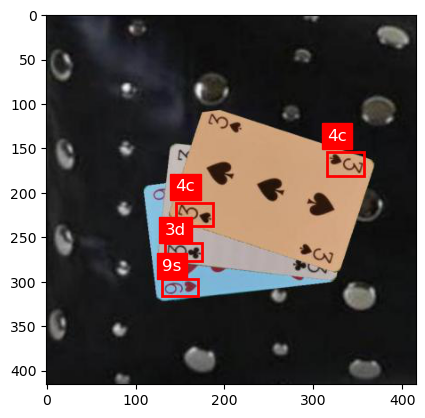

416 416


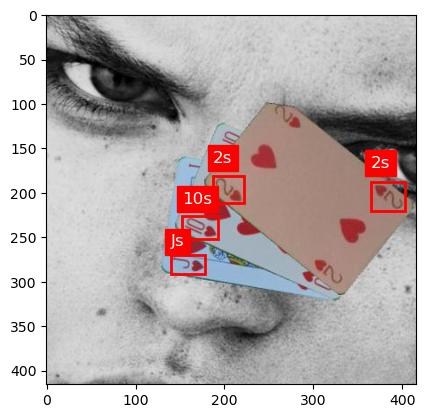

416 416


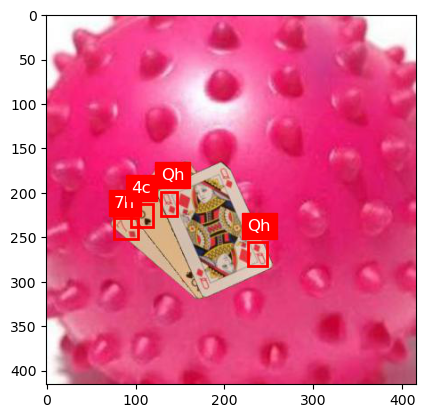

In [169]:
def show_boxes(image_path, df):
    subset=df[df['image']==image_path]
    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the image
    # read image using pil
    
    image = Image.open(train_path+"/"+image_path)
    #image=plt.imread(train_path+"/"+image_path)
    ax.imshow(image)
    
    width, height = image.size
    
    print(width, height)

    # Create a Rectangle patch
    for i, row in subset.iterrows():
        rect = patches.Rectangle((row['x']*width-row['w']*width/2, row['y']*height-row['h']*height/2), row['w']*width, row['h']*height, linewidth=2, edgecolor='r', facecolor='none')       
        # *width-row['w']*width/2 because x and y are center of rectangle, not top left corner
        # Add the patch to the Axes
        ax.text(row['x']*width-row['w']*width/2, row['y']*height-row['h']*height, class_dict[row['class']], fontsize=12, color='white', backgroundcolor='red')
        #annotate with class name   
        ax.add_patch(rect)

    plt.show()
    
show_boxes('998828570_jpg.rf.f8fabf7ac137caa3a8999103a1cec077.jpg', df)
show_boxes('997690810_jpg.rf.80d373d25fc3f744ce367cb0b6f200a8.jpg', df)
show_boxes('220444364_jpg.rf.885c8bc6d8a9b8f69cd9e0626d58f775.jpg', df)

In [171]:
import torch

class Dataset(torch.utils.data.Dataset):
    def __init__(self, df, image_path, classes, transform=None):
        self.df = df
        self.image_path = image_path
        self.classes = classes
        self.transform = transform
        
    def __len__(self):
        return len(self.df['image'].unique())
    
    def __getitem__(self, idx):
        image_path = self.df['image'].unique()[idx]
        image = Image.open(self.image_path+"/"+image_path)
        subset=self.df[self.df['image']==image_path]
        boxes=subset[['x', 'y', 'w', 'h']].values
        labels=subset['class'].values
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)
        target = {}
        target['boxes'] = boxes
        target['labels'] = labels
        target['objectness']=torch.ones(len(labels), dtype=torch.int64)
        if len(target['boxes'])<4:
            target['boxes']=torch.cat((target['boxes'], torch.zeros(4-len(target['boxes']), 4)))
            target['labels']=torch.cat((target['labels'], torch.zeros(4-len(target['labels']), dtype=torch.int64)))
            target['objectness']=torch.cat((target['objectness'], torch.zeros(4-len(target['objectness']), dtype=torch.int64)))
        #transform
        if self.transform:
            image = self.transform(image)
        #print("image.shape in dataset", image.shape)
        #print("target in dataset", target)
        return image, target
    
from torchvision import transforms
transform = transforms.Compose([transforms.ToTensor()])
dataset = Dataset(df, train_path, classes, transform)
image, target = dataset[0]

print(image.shape)

print(target)

torch.Size([3, 416, 416])
{'boxes': tensor([[0.4603, 0.6935, 0.0649, 0.0421],
        [0.6442, 0.5012, 0.0637, 0.0889],
        [0.6142, 0.0745, 0.0649, 0.0889],
        [0.0000, 0.0000, 0.0000, 0.0000]]), 'labels': tensor([53, 39, 39,  0]), 'objectness': tensor([1, 1, 1, 0])}


In [174]:
import torchvision
from torchvision.models import ResNet50_Weights




class Model(torch.nn.Module):
    def __init__(self, hidden_size=None, dropout=0.4):
        super().__init__()
        self.backbone=torchvision.models.resnet50(weights=ResNet50_Weights.DEFAULT)
        
        self.backbone_output_size=1000
        self.lin1=torch.nn.Linear(self.backbone_output_size, hidden_size)
        self.batch_norm_lin1=torch.nn.BatchNorm1d(hidden_size)
        self.lin2=torch.nn.Linear(hidden_size, hidden_size)
        number_classes=len(class_dict)
        number_boxes=4
        self.neurons_per_box=4+1+number_classes      # 4 for bounding box, 2 for objectness, number_classes for class (objectness means if there is an object in the bounding box or not)
        output_neurons=number_boxes*self.neurons_per_box
        print("output_neurons:", output_neurons)
        self.lin3=torch.nn.Linear(hidden_size, output_neurons)
        self.relu=torch.nn.ReLU()                           
        self.softmax=torch.nn.Softmax(dim=1)                
        self.dropout=torch.nn.Dropout(p=dropout)   
        # freeze backbone
        for param in self.backbone.parameters():
            param.requires_grad = False
 
    def forward(self, x):
        x=self.backbone(x)
        x=x.view(-1, self.backbone_output_size)
        x=self.lin1(x)
        x=self.batch_norm_lin1(x)
        x=self.relu(x)
        x=self.dropout(x)
        x=self.lin2(x)
        x=self.batch_norm_lin1(x)
        x=self.relu(x)
        x=self.dropout(x)
        x=self.lin3(x)
        # sigmoid for objectness, Neuron 5, 5+neurons_per_box, 5+2*neurons_per_box, 5+3*neurons_per_box
        for i in range(4):
            x[:, i*self.neurons_per_box+4]=torch.sigmoid(x[:, i*self.neurons_per_box+4])
        
        #sigmoid for x, y, w, h
        for i in range(4):
            x[:, i*self.neurons_per_box]=torch.sigmoid(x[:, i*self.neurons_per_box])
            x[:, i*self.neurons_per_box+1]=torch.sigmoid(x[:, i*self.neurons_per_box+1])
            x[:, i*self.neurons_per_box+2]=torch.sigmoid(x[:, i*self.neurons_per_box+2])
            x[:, i*self.neurons_per_box+3]=torch.sigmoid(x[:, i*self.neurons_per_box+3])
        return x
    
model=Model(hidden_size=100)
loader=torch.utils.data.DataLoader(dataset, batch_size=13, shuffle=True)
for image, target in loader:
    print(image.shape)
    output=model(image)
    assert output.shape[0]==13, "batch size is not correct, its "+str(output.shape[0])
    print(output.shape) 
    break


output_neurons: 228
torch.Size([13, 3, 416, 416])
torch.Size([13, 228])
53


In [184]:
device=torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
import torch.nn.functional as F

def loss_fun(output, target):
    # output: batch_size , number_boxes x (4+2+number_classes)
    #        this means: for every box we have 4 coordinates, 1 objectness, number_classes for class --> 58 Neurons
    #                    the first 4 neurons are for the bounding box, the 5th neuron is for objectness, the last 53 neurons are for the class
    # mse for bounding box
    # cross entropy for object classification
    # cross entropy for objectness
    # sum up all losses
    
    number_boxes=4
    neurons_per_box=4+1+number_classes
    output=output.view(-1, number_boxes, neurons_per_box)
    target_boxes=target['boxes']
    mse=torch.nn.MSELoss()
    
    mse_loss=mse(output[:, :, :4], target_boxes)      
    target_labels=target['labels']
    objectness_loss_fn=torch.nn.BCELoss()   
    objectness_loss=objectness_loss_fn(output[:, :, 4], target['objectness'].float())
    class_loss=F.cross_entropy(output[:, :, 5:].view(-1, 53), target_labels.view(-1))
    loss=mse_loss+objectness_loss+class_loss
    return loss, {'mse_loss':mse_loss, 'objectness_loss':objectness_loss, 'class_loss':class_loss}
    
# test loss function
output=torch.rand(13*4*(4+1+number_classes)).view(13, 4*(4+1+number_classes))
target={}
target['boxes']=torch.rand(13, 4, 4)
target['labels']=torch.randint(1, number_classes, (13, 4))
target['objectness']=torch.randint(0, 2, (13, 4))
loss=loss_fun(output, target)
print("random input", loss)

# create an output with 4 bounding boxes, 2 objectness and 53 classes based on a sample in df
output=[]

target={
        'boxes':torch.tensor([]),
        'labels':torch.tensor([]),
        'objectness':torch.tensor([])
    }
for i in range(4):
    sample=df.sample(1)
    subset=df[df['image']==sample['image'].values[0]  ]
    box_output=[]
    for idx, row in subset.iterrows():
        box_x=row['x']
        box_y=row['y']
        box_w=row['w']
        box_h=row['h']
        clazz=row['class']
        clazz_tensor = torch.tensor([clazz], dtype=torch.int64)
        clazz_one_hot=torch.nn.functional.one_hot(clazz_tensor, num_classes=number_classes)
        clazz_one_hot=torch.tensor(clazz_one_hot, dtype=torch.long)
        clazz_one_hot_as_list=clazz_one_hot[0].tolist()
        # every value in clazz_one_hot_as_list with value 0 should be -10
        for i in range(len(clazz_one_hot_as_list)):
            if clazz_one_hot_as_list[i]==0:
                clazz_one_hot_as_list[i]=-10
            else:
                clazz_one_hot_as_list[i]=100
        box_output.append([box_x, box_y, box_w, box_h, 1]+clazz_one_hot_as_list)
        target['boxes']=torch.cat((target['boxes'], torch.tensor([box_x, box_y, box_w, box_h]).view(1, 4)))
        target['labels']=torch.cat((target['labels'], clazz_tensor.view(1, 1)))
        target['objectness']=torch.cat((target['objectness'], torch.tensor([1], dtype=torch.int64).view(1, 1)))
        
    if len(box_output)<4:
        for i in range(4-len(box_output)):
            box_output.append([0, 0, 0, 0, 0]+[0]*number_classes)
            target['boxes']=torch.cat((target['boxes'], torch.zeros(1, 4)))
            target['labels']=torch.cat((target['labels'], torch.zeros(1, dtype=torch.int64).view(1, 1)))
            target['objectness']=torch.cat((target['objectness'], torch.zeros(1, dtype=torch.int64).view(1, 1)))
    box_out=torch.tensor(box_output).view(1, 232)
    output.append(box_out)
target['boxes']=target['boxes'].view(4, 4, 4)
target['labels']=target['labels'].view(4, 4).type(torch.int64)
target['objectness']=target['objectness'].view(4, 4).type(torch.int64)

output=torch.cat(output)
print(output.shape)           
loss=loss_fun(output, target)
print("perfect input", loss)

random input (tensor(5.1092), {'mse_loss': tensor(0.1521), 'objectness_loss': tensor(0.9545), 'class_loss': tensor(4.0027)})
torch.Size([4, 232])
perfect input (tensor(0.), {'mse_loss': tensor(0.), 'objectness_loss': tensor(0.), 'class_loss': tensor(0.)})


C:\Users\Bernd\AppData\Local\Temp\ipykernel_198312\3771615020.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  clazz_one_hot=torch.tensor(clazz_one_hot, dtype=torch.long)


In [178]:
def get_validation_loss(model, loader, loss_fun):
    model.eval()
    with torch.no_grad():
        loss=0
        detailed_losses={'mse_loss':0, 'objectness_loss':0, 'class_loss':0}
        for image, target in loader:
            image=image.to(device)
            target['boxes']=target['boxes'].to(device)
            target['labels']=target['labels'].to(device)
            target['objectness']=target['objectness'].to(device)
            output=model(image)
            loss, detailed_loss=loss_fun(output, target)
            detailed_losses['mse_loss']+=detailed_loss['mse_loss']
            detailed_losses['objectness_loss']+=detailed_loss['objectness_loss']
            detailed_losses['class_loss']+=detailed_loss['class_loss']
        detailed_losses['mse_loss']=detailed_losses['mse_loss']/len(loader)
        detailed_losses['objectness_loss']=detailed_losses['objectness_loss']/len(loader)
        detailed_losses['class_loss']=detailed_losses['class_loss']/len(loader)
        return loss/len(loader), detailed_losses

In [182]:
def train(epochs):
    model.train()
    epoch_losses=[]
    for epoch in range(epochs):
        losses=[]
        bar=tqdm(loader)
        step=0
        steps_valid_loss=50
        for image, target in bar:
            optimizer.zero_grad()
            bar.update(1)
            image=image.to(device)
            target['boxes']=target['boxes'].to(device)
            target['labels']=target['labels'].to(device)
            target['objectness']=target['objectness'].to(device)
            output=model(image)
            print("output.shape", output.shape)
            print("target['boxes'].shape", target['boxes'].shape)
            loss=loss_fun(output, target)
            loss.backward()
            optimizer.step()
            losses.append(loss.item())
            bar.set_description(f"loss: {loss.item()}")
            step+=1
            if step%steps_valid_loss==0:
                valid_loss, detailed_losses=get_validation_loss(model, loader_valid, loss_fun)
                print("valid_loss:", valid_loss, "detailed_losses:", detailed_losses)
        epoch_loss=np.mean(losses)
        epoch_losses.append(epoch_loss)
        
        print("epoch:", epoch, "loss:", epoch_loss)
    return epoch_losses        

In [183]:
torch.cuda.empty_cache()
model=Model(hidden_size=1000)
model.to(device)
optimizer=torch.optim.AdamW(model.parameters(), lr=0.0001)
loader=torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
loader_valid=torch.utils.data.DataLoader(Dataset(df_valid, val_path, classes, transform), batch_size=32, shuffle=True)

losses=train(10)
plt.plot(losses)
plt.show()

output_neurons: 228


  0%|          | 0/438 [00:00<?, ?it/s]

output.shape torch.Size([32, 228])
target['boxes'].shape torch.Size([32, 4, 4])


RuntimeError: shape '[-1, 4, 58]' is invalid for input of size 7296

In [ ]:
# save model

torch.save(model.state_dict(), 'model.pth')

In [ ]:
train(10)

  0%|          | 0/438 [00:00<?, ?it/s]

mse_loss tensor(0.0257, device='cuda:0', grad_fn=<MseLossBackward0>)
objectness_loss tensor(0.1725, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
class_loss tensor(2.6783, device='cuda:0', grad_fn=<NllLossBackward0>)
mse_loss tensor(0.0237, device='cuda:0', grad_fn=<MseLossBackward0>)
objectness_loss tensor(0.0983, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
class_loss tensor(2.7417, device='cuda:0', grad_fn=<NllLossBackward0>)
mse_loss tensor(0.0216, device='cuda:0', grad_fn=<MseLossBackward0>)
objectness_loss tensor(0.0921, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
class_loss tensor(2.8464, device='cuda:0', grad_fn=<NllLossBackward0>)
mse_loss tensor(0.0227, device='cuda:0', grad_fn=<MseLossBackward0>)
objectness_loss tensor(0.1064, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward0>)
class_loss tensor(2.6547, device='cuda:0', grad_fn=<NllLossBackward0>)
mse_loss tensor(0.0246, device='cuda:0', grad_fn=<MseLossBackward0>)
objectness_loss tensor(

KeyboardInterrupt: 